PS3 Problem 1

Plots Flux vs time collected fromt he Kepler Satellite, from the lightcurve data from host star of Kepler 7b.

Because some values in the flux & flux_err return nan, the program uses a clean function, which replaces the nan value with the last valid value in the array, which here correlates with the last f(t) value.

Because the cells later in the program call functions defined in earlier cells, if the cells are ran out of order (top to bottom, there may be errors), restart and run all cells is an effective option. 

Collaborators: Stephen Coffey, Yassine Abaakil 

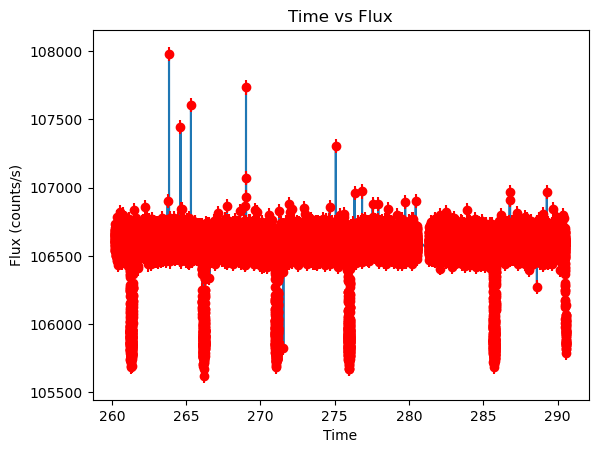

In [1]:
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt
import math 

lcs = lk.search_lightcurve("Kepler-7b", mission="Kepler", cadence="short").download_all()
time = lcs[0].time.value # get the time of each observation
flux = np.array(lcs[0].flux.value.data) # get the flux
flux_err = np.array(lcs[0].flux_err.value.data) # get the error in the flux


def clean(): 
  #takes out the nan from the arrays
  #the nans are replaced the last most recent flux value
  #print(len(flux))
  for i in range(0,(len(flux)-1)): 
    if str(flux[0]) == 'nan':
      flux[i]=flux[i+1]
    else: 
       if str(flux[i]) == 'nan':
          flux[i]=flux[i-1]
         
    i+=1

    
   #print(len(flux_err))
   #the nans are replaced the last most recent flux-error value
  for i in range(0,(len(flux_err)-1)): 
    if str(flux_err[0]) == 'nan':
      flux_err[i]=flux_err[i+1]
    else: 
       if str(flux_err[i]) == 'nan':
          flux_err[i]=flux_err[i-1]
         
    i+=1

  #print(flux)
  #print(time)
  #print(flux_err)


def plot(): 
  #plots the graph of time vs flux, labels title, axises and red errorbars
  plt.plot(time, flux)
  plt.xlabel("Time")
  plt.ylabel("Flux (counts/s)")
  plt.title("Time vs Flux")
  plt.errorbar(time, flux, yerr=flux_err, fmt="o", color="r")
  #plt.xlim(266,266.35)
  plt.show()    
    
def main():
  clean()
  plot()

main() 

Problem 2 Part A

This code looks specifically at the area around times 264-267 from the orginal Kepler 7b data(the blue & red). The baseline flux is around 106600 count/s. The parameters for the model line (in lime green) are visually approximated for now. The model line uses earlrier code to calculate the trend line. While it wouldve been also possible to read in a file with z and flux values for the model, the code and functinos from earlier were reintergrated, so that the p could be manipulated to give better shapes to fit out Kepler 7b data. 

z= -0.50, flux = 106609.1874
z= -0.45, flux = 106326.1254
z= -0.40, flux = 106074.3492
z= -0.35, flux = 105874.7160
z= -0.30, flux = 105809.1648
z= -0.25, flux = 105809.1648
z= -0.20, flux = 105809.1648
z= -0.15, flux = 105809.1648
z= -0.10, flux = 105809.1648
z= -0.05, flux = 105809.1648
z= 0.00, flux = 105809.1648
z= 0.05, flux = 105809.1648
z= 0.10, flux = 105809.1648
z= 0.15, flux = 105809.1648
z= 0.20, flux = 105809.1648
z= 0.25, flux = 105809.1648
z= 0.30, flux = 105809.1648
z= 0.35, flux = 105874.7160
z= 0.40, flux = 106074.3492
z= 0.45, flux = 106326.1254
z= 0.50, flux = 106609.1874


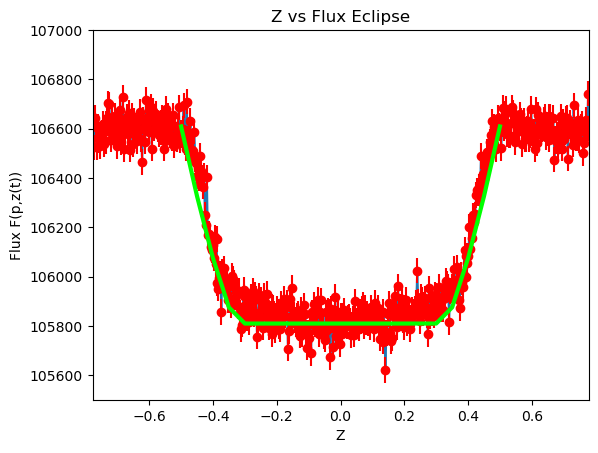

In [2]:
t0=266.185 #time of max eclipse
tau=0.225 #estimated time of eclipse 
z= np.array((time-t0)/tau)   #convert time into z 
#print(z)

#global arrays we will use to plot the the modeling line later on
Z_array=[]
flux_array=[]

def k1(p1,z1):
  k1 = math.acos((1-(p1**2)+(z1**2))/(2*z1))
  #print(x) #test and print value
  return k1 
  
def k0(p1,z1):
  k0=math.acos(((p1**2)+(z1**2)-1)/(2*p1*z1))
    #print(x) #test and print value
  return k0
  
def step2(p1,z1):
  val = (p1**2)*k0(p1,z1)+k1(p1,z1)-math.sqrt(((4*z1**2)-(1+(z1**2)-(p1**2))**2)/4)
    #print(val) #test and print value
  product = (1/math.pi)*val
  product = round(product,4)
    #print(product) #test and print value
  return product 
      
def peicewise(p1,z1):
    if ((1+p1) < z1):
        return 0
    absVal= math.fabs(1-p1)
    if(absVal<z1 and z1<=(1+p1)):
      return step2(p1,z1)
    if(z1<= (p1-1)):
      return 1  
    if(z1 <= (1-p1)):
      return p1**2

    else:
        print("Error in Peicewiese function z= "+str(zr)+" p= "+str(p1))
        return -999

def fluxfunc(p1,z1): 
  while (z1<=0.5): 
        Z_array.append(z1)
        peicewiseVal= peicewise(p1,math.fabs(z1))  # the math.fabs for |z| 
        assert peicewiseVal !=-999, print("Peicewisefunction failure at z=" +z1) 
        fluxVal = (1-peicewiseVal) 
        fluxVal = round(fluxVal,4)*14898+97800   #these parameters the model line to fit the data from Kepler7b
        #print("z="+str(z)+" flux=" + str(fluxVal))
        print("z= %4.2f, flux = %6.4f" % (z1, fluxVal))
        #print(z)
        flux_array.append(fluxVal) #since matplot needs arrays, this puts values into global array
        z1=z1+0.05
        z1=round(z1,8) #call the round function to avoid float error

#the functinos above, k1,k0,step2,peicewise,and fluxfunc are there to calculate the model trend line    
    
def fluxcall():
     p1 = 0.68
     z1= -0.5 
  # p is the ratio of planet radius to the stellar radius
  # z is distance between star center and planet center
  #divided and normalized by the stellar radius
     fluxfunc(p1,z1)
    # print(Z_array,flux_array)
     plt.plot(z, flux)  #this plots the data from Kepler 7b
     plt.plot(Z_array, flux_array, color='lime',zorder=10,linewidth=3.0) #plots the theoretical model line
     #labeling and plot settings
     plt.xlabel("Z")
     plt.ylabel("Flux F(p,z(t))")
     plt.title("Z vs Flux Eclipse")
     plt.errorbar(z, flux, yerr=flux_err, fmt="o", color="r")
     plt.xlim(-0.77777778,0.77777778)
     plt.ylim(105500,107000)
     plt.show()
    

def main():
    fluxcall()
    
main()

Problem 2 part B

Here simpsonrule is resused to create a model line for our eclipse data. Once again the eclipse, sectioned from 264-267 from the orginal Kepler 7b data(the blue & red) is used. This time, the limb darkening function actually has a function rather than returning zero, its value is dependent on radius. Since the code uses some function and varaibles from earlier in the notebook, it needs the above cells to run first to retrieve those varaibles, and to avoid collisions of varaibles, the z for the model here is written as z2. 

C:\Users\afham\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


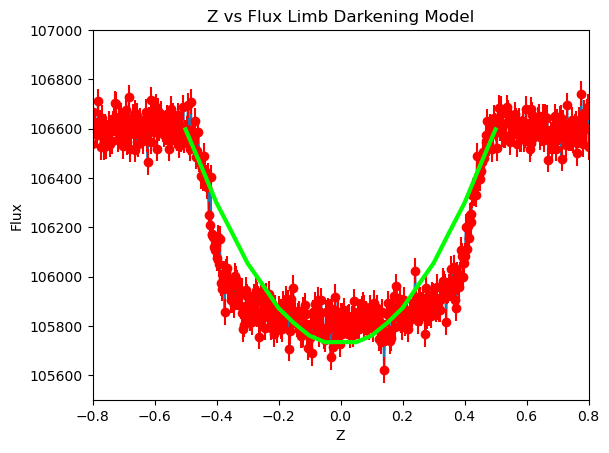

In [3]:
import math 
import numpy as np

z2_array=[]      #will be used to plot 
flux2_array=[]   #will be used to plot 

def f(p,z2,r, flag):   #defintion for the functions in the integrands
  if(flag):  #if flag is true, use the function from integrand in numerator
    delta= deltaFunc(p,z2,r)
    assert delta != -999, 'function error at p '+str(p)+' z '+str(z)+' r '+str(r)
    return (limbdarkening(r)*(1-delta)*2*r)
  else:  #else use the function in the integrand of the denominator
    return (limbdarkening(r)*2*r)

def compare(fluxVal,p,z2):
  #given the I(r) the intergal can be solved using the older flux function,
  #by comparing to when z2=0.9, & flux=0.9684, but solves for 0.9684 using p&z2 here.
  val = (p**2)*(math.acos(((p**2)+(z2**2)-1)/(2*p*z2)))+(math.acos((1-(p**2)+(z2**2))/
                        (2*z2)))-math.sqrt(((4*z2**2)-(1+(z2**2)-(p**2))**2)/4)
    #print(val) #test and print value
  product = val/math.pi
    #print(product) #test and print value
  return math.fabs(fluxVal-(1-product))

def simprule(n,x1,x2,p,z2,flag): 
  sum =0 #curent intergal approximation
  r=x1 # starting point for integration
  h = (x2-x1)/(n) #(Upperbound-lowerbound)/n will give us width
  #print(h)  #checking for error of bounds and width 

  for i in range (0,(n+1)): 
      if(i==0 or i==(n)):
        sum += f(p,z2,r,flag)
      else: 
        if( i%2 ==0):
          sum += 2*f(p,z2,r,flag)
        else:
          sum += 4*f(p,z2,r,flag)
    #print("x = " + str(x)) # testing iteration
      r= r+h 
      i=i+1
   
  sum = sum*(h/3)  # finally multiply by the width/3
  #print("Integral (Simpsons Rule) for %6d iterations = %12.11f" % (n,sum))
  return sum

      
def deltaFunc(p,z2,r):
    if (r>= (z2+p) or r<=(z2-p)):
        return 0
    if((r+z2) <= p):
      return 1
    else:
      val = (np.arccos(((z2**2)-(p**2)+(r**2))/(2*z2*r)))/math.pi
    if(math.isnan(val)):
        print('Error with Delta function at p '+str(p)+' z '+str(z)+' r '+str(r))
        return -999
    return val

def limbdarkening(r):  #here the limb darkening has a coded function, where u represent the greek mu
  u=(1-r**2)**1/2
  limb=(1-u**(3/2))
  return 1-limb

def integral(n,p,z2,flag):
  x1=0 #lowerbound
  x2=1 #upperbound
  sum = simprule(n,x1,x2,p,z2,flag)
  return sum

def flux2(p,z2): 
    n=100
    while(z2<=0.5):
        z2_array.append(z2)
        numerator = integral(n,p,math.fabs(z2), True)
        denominator = integral(n,p,math.fabs(z2), False)
        fluxVal = ((numerator/denominator)*25550)+82650 #this fits the model line to the actual data
        flux2_array.append(fluxVal)
        #print("z2="+str(z2)+" flux=" + str(fluxVal))
        #error= compare(fluxVal,p,z2)
        #print("z2= %4.2f, flux = %12.11f" %(z2,fluxVal))
        z2+=0.05
    
    
    plt.plot(z, flux)  #this plots the data from Kepler 7b
    plt.plot(z2_array, flux2_array, color='lime',zorder=10, linewidth=3.0) #plots the theoretical model line
    plt.xlabel("Z")
    plt.ylabel("Flux")
    plt.title("Z vs Flux Limb Darkening Model")
    plt.errorbar(z, flux, yerr=flux_err, fmt="o", color="r")
    plt.xlim(-0.8,0.8)
    plt.ylim(105500,107000)
    plt.show()
    #print(z2)

def main(): 
  p = 0.2
  z2= -0.5
  # p is the ratio of planet radius to the stellar radius
  # z2 is distance between star center and planet center
  #divided and normaliz2ed by the stellar radius
  # r is the radius 
  flux2(p,z2) 

main() 

Problem 3

This code finds the root of d(Teff)-0.5 using the bisection method. It assumes the lowest temp cannot be below absolute zero and the highest temp in this context to not be beyond 6000k

In [4]:
#global constants fro the inner edge fo the habitable zone
Sdot=1.014
a=8.177e-5
b=1.706e-9
d=0.5 #distance in AU

#function for Seff, the lower denoimnator in out function
def S_eff(T_eff):  
  T=T_eff-5780
  S=(Sdot)+((a)*T)+((b)*(T**2))
  return S

def f(T_eff):
  L=(T_eff/5780)**4
  return ((L/S_eff(T_eff))**(1/2))-d

#the bisect method find the root of our function d(Teff)-0.5
def bisect(a,b):
  tol=10e-6 #this the tolareance for the root
  m=a  # m is the midpoint
  while (b-a) > tol:
    m=(a+b)/2
    if(f(m)==0):
      break
    else: 
      if (f(a)*f(m) < 0) : #tests for different signs
        b = m              #iterate on the left half
      else:
        a = m              #iterate on the right half
  if(math.isnan(m) or m<a or m>b):
        print('Error with bisection at a= '+str(a)+' b= '+str(b))
        return -999
  return m


def main():
  a=0                 #the lowest temp possible cannot be below absolute zero
  b=6000              #around the suns 5780k
  root=bisect(a,b)    
  assert root != -999, "Error with bisection at a= "+str(a)+" b= "+str(b)
  print("The effective Temperature root is: %10.4f Kelvin" % (root)) 

main()

The effective Temperature root is:  3947.0646 Kelvin
